In [3]:
# Importando as bibliotecas necessárias no início do notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Para visualizações interativas
from datetime import datetime, timedelta

# Configurações para melhor visualização dos DataFrames no Jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

# Configurações visuais para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Tamanho padrão para figuras
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [4]:
# Carregando o dataset e exibindo as primeiras linhas
df = pd.read_csv('Aluguel de bicicletas.csv')





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551480 entries, 0 to 551479
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             551480 non-null  object 
 1   rideable_type       551480 non-null  object 
 2   started_at          551480 non-null  object 
 3   ended_at            551480 non-null  object 
 4   start_station_name  551331 non-null  object 
 5   start_station_id    551328 non-null  float64
 6   end_station_name    550513 non-null  object 
 7   end_station_id      550511 non-null  float64
 8   start_lat           551480 non-null  float64
 9   start_lng           551480 non-null  float64
 10  end_lat             550710 non-null  float64
 11  end_lng             550710 non-null  float64
 12  member_casual       551480 non-null  object 
dtypes: float64(6), object(7)
memory usage: 54.7+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,551480,551480,551480,551480,551331,551328.000000,550513,550511.000000,551480.000000,551480.000000,550710.000000,550710.000000,551480
unique,551480,2,468441,467938,619,NaN,622,NaN,NaN,NaN,NaN,NaN,2
top,883B7001B497B950,docked_bike,2020-07-12 13:16:59,2020-07-15 11:44:46,Streeter Dr & Grand Ave,NaN,Streeter Dr & Grand Ave,NaN,NaN,NaN,NaN,NaN,member
freq,1,549545,12,18,8598,NaN,9051,NaN,NaN,NaN,NaN,NaN,282184
mean,NaN,NaN,NaN,NaN,NaN,221.608275,NaN,222.384713,41.904760,-87.643015,41.905051,-87.643308,NaN
std,NaN,NaN,NaN,NaN,NaN,159.937932,NaN,160.211740,0.041086,0.024437,0.041225,0.024587,NaN
min,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,41.736646,-87.774704,41.729267,-87.774704,NaN
25%,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,94.000000,41.882664,-87.654787,41.882830,-87.655486,NaN
50%,NaN,NaN,NaN,NaN,NaN,195.000000,NaN,195.000000,41.899643,-87.638973,41.900219,-87.639192,NaN
75%,NaN,NaN,NaN,NaN,NaN,308.000000,NaN,309.000000,41.929546,-87.626217,41.930585,-87.626761,NaN


member_casual
member    282184
casual    269296
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribuição de Membros vs Membros Casuais')

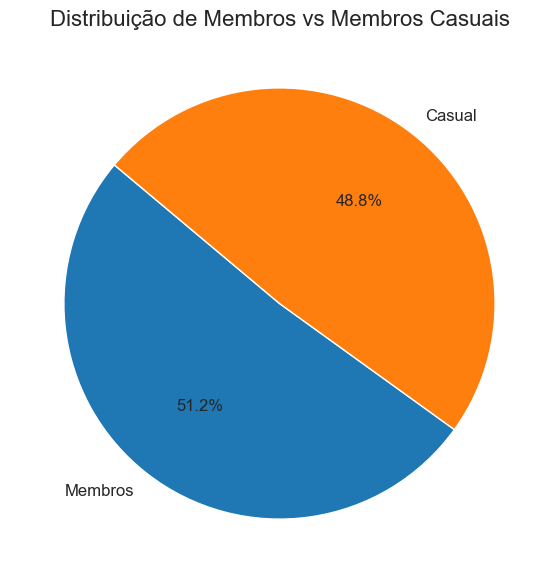

In [5]:
# inspeção inicial do DataFrame
# Exibindo as primeiras linhas
df.head()
# Exibindo informações gerais do DataFrame
df.info()
# Exibindo estatísticas descritivas do DataFrame
display(df.describe(include='all'))
# Verificando a presença de valores ausentes
print(df['member_casual'].value_counts())
# gerando um gráfico de pizza para a distribuição de membros e casuais
plt.pie(df['member_casual'].value_counts(), labels=['Membros', 'Casual'], autopct='%1.1f%%', startangle=140);
plt.title('Distribuição de Membros vs Membros Casuais')


In [6]:
# Tratar os dados
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551480 entries, 0 to 551479
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             551480 non-null  object        
 1   rideable_type       551480 non-null  object        
 2   started_at          551480 non-null  datetime64[ns]
 3   ended_at            551480 non-null  datetime64[ns]
 4   start_station_name  551331 non-null  object        
 5   start_station_id    551328 non-null  float64       
 6   end_station_name    550513 non-null  object        
 7   end_station_id      550511 non-null  float64       
 8   start_lat           551480 non-null  float64       
 9   start_lng           551480 non-null  float64       
 10  end_lat             550710 non-null  float64       
 11  end_lng             550710 non-null  float64       
 12  member_casual       551480 non-null  object        
dtypes: datetime64[ns](2), float64

In [7]:
# 3. Criar Novas Colunas Essenciais para Análise
# Criando colunas Duração da Viagem em Minutos
df['ride_length_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['ride_length_minutes'] = df['ride_length_minutes'].round().astype(int)
# Criando colunas de Dia da semana
df['day_of_week'] = df['started_at'].dt.day_name()
df['weekday_num'] = df['started_at'].dt.dayofweek # 0=Monday, 6=Sunday
# Criando colunas Mês da Viagem
df['month'] = df['started_at'].dt.month_name()
df['month_num'] = df['started_at'].dt.month
# Criando colunas Hora do Dia
df['hour_of_day'] = df['started_at'].dt.hour


In [8]:
# 4. Tratar Valores Ausentes (NaNs)
# Remover todas as linhas com valores nulos diretamente no DataFrame original
df.dropna(inplace=True)
# Conferir se ainda existem valores nulos
print(df.isnull().sum())
# Exibir as primeiras linhas após remoção
df.head()



ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
ride_length_minutes    0
day_of_week            0
weekday_num            0
month                  0
month_num              0
hour_of_day            0
dtype: int64


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week,weekday_num,month,month_num,hour_of_day
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member,4,Thursday,3,July,7,15
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member,24,Friday,4,July,7,23
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual,7,Wednesday,2,July,7,19
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual,21,Friday,4,July,7,19
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member,5,Saturday,5,July,7,10


In [9]:
# 5. Tratar Duplicatas
df.drop_duplicates(inplace=True)

In [10]:
# 6. Tratar Valores Inconsistentes/Inválidos
MAX_RIDE_LENGTH_MINUTES = 1440  # Definindo o máximo como 24 horas (em minutos)
df = df[df['ride_length_minutes'] > 0]
df = df[df['ride_length_minutes'] <= MAX_RIDE_LENGTH_MINUTES]


In [11]:
# 7. Verificar a Integridade dos Dados (Após Processamento)
print(df.head())
print(df.info())
print(df['ride_length_minutes'].describe())

            ride_id rideable_type          started_at            ended_at             start_station_name  start_station_id           end_station_name  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  ride_length_minutes day_of_week  weekday_num month  month_num  hour_of_day
0  762198876D69004D   docked_bike 2020-07-09 15:22:02 2020-07-09 15:25:52          Ritchie Ct & Banks St             180.0   Wells St & Evergreen Ave           291.0  41.906866 -87.626217  41.906724 -87.634830        member                    4    Thursday            3  July          7           15
1  BEC9C9FBA0D4CF1B   docked_bike 2020-07-24 23:56:30 2020-07-25 00:20:17         Halsted St & Roscoe St             299.0       Broadway & Ridge Ave           461.0  41.943670 -87.648950  41.984045 -87.660274        member                   24      Friday            4  July          7           23
2  D2FD8EA432C77EC1   docked_bike 2020-07-08 19:49:07 2020-07-08 19:56:22  Lake Shore Dr & Diversey 

In [12]:
# 8 Comparação da Duração Média da Viagem
avg_ride_length = df.groupby('member_casual')['ride_length_minutes'].mean().reset_index()
print(avg_ride_length)

  member_casual  ride_length_minutes
0        casual            44.626546
1        member            17.427675


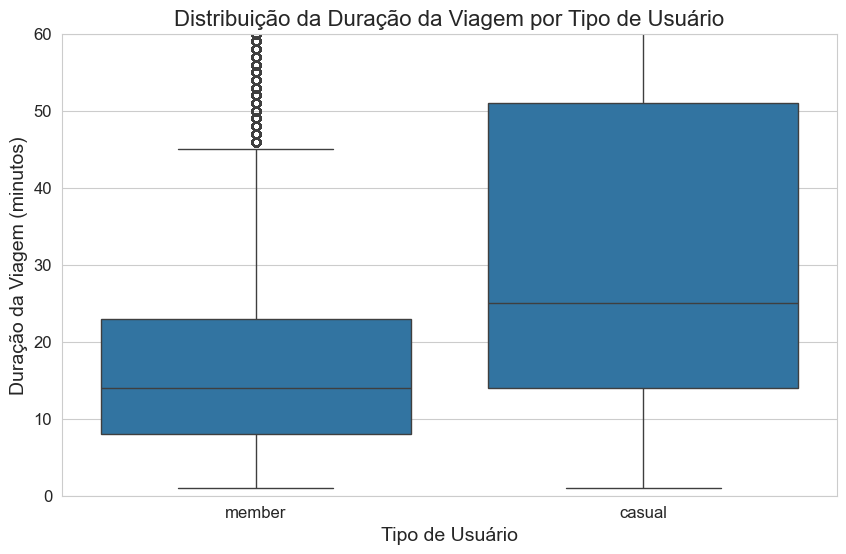

In [13]:
# 9 Distribuição da Duração da Viagem
plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='ride_length_minutes', data=df)
plt.title('Distribuição da Duração da Viagem por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Duração da Viagem (minutos)')
plt.ylim(0, 60) # Limitar para melhor visualização, pois há outliers longos
plt.show()

In [14]:
# 10 Contagem de Viagens por Tipo de Usuário
ride_counts = df['member_casual'].value_counts(normalize=True) * 100
print("\n--- Porcentagem de Viagens por Tipo de Usuário ---")
print(ride_counts)


--- Porcentagem de Viagens por Tipo de Usuário ---
member_casual
member    51.012954
casual    48.987046
Name: proportion, dtype: float64


In [15]:
# 11 Ordenar os dias da semana corretamente
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

In [16]:
# 12 Duração média da viagem por dia da semana e tipo de usuário
avg_ride_length_dow = df.groupby(['day_of_week', 'member_casual'])['ride_length_minutes'].mean().unstack().reindex(day_order)
print("\n--- Duração Média da Viagem por Dia da Semana e Tipo de Usuário ---")
print(avg_ride_length_dow)


--- Duração Média da Viagem por Dia da Semana e Tipo de Usuário ---
member_casual     casual     member
day_of_week                        
Monday         45.825899  16.827283
Tuesday        41.998728  16.694188
Wednesday      40.347380  16.418221
Thursday       41.538856  16.783037
Friday         42.797361  17.280644
Saturday       47.709162  19.154912
Sunday         49.390263  19.360171


C:\Users\Admin\AppData\Local\Temp\ipykernel_6344\761878238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ride_length_dow = df.groupby(['day_of_week', 'member_casual'])['ride_length_minutes'].mean().unstack().reindex(day_order)


In [17]:
# 13 Contagem de viagens por dia da semana e tipo de usuário
ride_counts_dow = df.groupby(['day_of_week', 'member_casual']).size().unstack().reindex(day_order)
print("\n--- Contagem de Viagens por Dia da Semana e Tipo de Usuário ---")
print(ride_counts_dow)


--- Contagem de Viagens por Dia da Semana e Tipo de Usuário ---
member_casual  casual  member
day_of_week                  
Monday          27553   34131
Tuesday         25938   35355
Wednesday       30376   42468
Thursday        36841   46985
Friday          49344   48827
Saturday        53370   37899
Sunday          42948   31721


C:\Users\Admin\AppData\Local\Temp\ipykernel_6344\1489013163.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_counts_dow = df.groupby(['day_of_week', 'member_casual']).size().unstack().reindex(day_order)


In [18]:
# 14 Padrões de Uso por Hora do Dia
# Duração média da viagem por hora do dia e tipo de usuário
avg_ride_length_hour = df.groupby(['hour_of_day', 'member_casual'])['ride_length_minutes'].mean().unstack()
print("\n--- Duração Média da Viagem por Hora do Dia e Tipo de Usuário ---")
print(avg_ride_length_hour.head()) # Mostra as primeiras horas



--- Duração Média da Viagem por Hora do Dia e Tipo de Usuário ---
member_casual     casual     member
hour_of_day                        
0              59.729332  16.924217
1              66.746196  18.182731
2              65.970013  15.462687
3              62.243316  17.259740
4              56.107905  15.625506


In [19]:
# 15 Contagem de viagens por hora do dia e tipo de usuário
ride_counts_hour = df.groupby(['hour_of_day', 'member_casual']).size().unstack()
print("\n--- Contagem de Viagens por Hora do Dia e Tipo de Usuário ---")
print(ride_counts_hour.head()) # Mostra as primeiras horas


--- Contagem de Viagens por Hora do Dia e Tipo de Usuário ---
member_casual  casual  member
hour_of_day                  
0                6048    1755
1                3877     996
2                2301     469
3                1122     308
4                 797     494


In [20]:
# 16 Estações Mais Populares (Top N)
# Top 10 estações de início para membros
top_start_members = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
print("\n--- Top 10 Estações de Início - Membros ---")
print(top_start_members)


--- Top 10 Estações de Início - Membros ---
start_station_name
Theater on the Lake                3020
Lake Shore Dr & North Blvd         2884
Clark St & Elm St                  2883
Burnham Harbor                     2504
Lake Shore Dr & Wellington Ave     2372
Broadway & Barry Ave               2155
Dearborn St & Erie St              2155
Wells St & Concord Ln              2034
Lake Shore Dr & Diversey Pkwy      2032
Lakefront Trail & Bryn Mawr Ave    2030
Name: count, dtype: int64


In [21]:
# 17 Top 10 estações de início para casuais
top_start_casuals = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
print("\n--- Top 10 Estações de Início - Casuais ---")
print(top_start_casuals)


--- Top 10 Estações de Início - Casuais ---
start_station_name
Streeter Dr & Grand Ave       6966
Lake Shore Dr & Monroe St     4529
Millennium Park               4340
Indiana Ave & Roosevelt Rd    3169
Lake Shore Dr & North Blvd    3130
Theater on the Lake           3092
Buckingham Fountain           2653
Michigan Ave & Lake St        2645
Michigan Ave & Oak St         2479
Michigan Ave & 8th St         2473
Name: count, dtype: int64


In [22]:
# 18 Tipos de Bicicleta Usados
bike_type_usage = df.groupby(['rideable_type', 'member_casual']).size().unstack().fillna(0)
print("\n--- Uso de Tipos de Bicicleta por Tipo de Usuário ---")
print(bike_type_usage)


--- Uso de Tipos de Bicicleta por Tipo de Usuário ---
member_casual  casual  member
rideable_type                
docked_bike    265790  276429
electric_bike     580     957


In [23]:
# 19 Calcular a porcentagem de uso de cada tipo de bicicleta dentro de cada categoria de usuário
bike_type_usage_percent = bike_type_usage.apply(lambda x: x / x.sum() * 100, axis=0)
print("\n--- Porcentagem de Uso de Tipos de Bicicleta por Tipo de Usuário ---")
print(bike_type_usage_percent)


--- Porcentagem de Uso de Tipos de Bicicleta por Tipo de Usuário ---
member_casual     casual     member
rideable_type                      
docked_bike    99.782258  99.654993
electric_bike   0.217742   0.345007


C:\Users\Admin\AppData\Local\Temp\ipykernel_6344\3820352046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='member_casual', y='ride_length_minutes', data=avg_ride_length, palette='viridis')


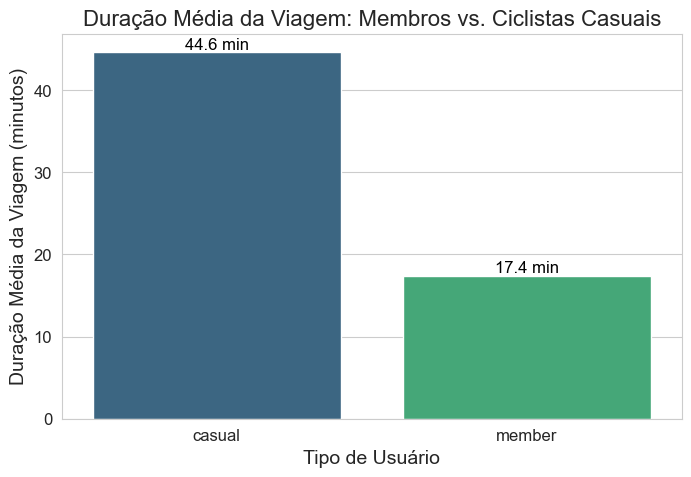


Insight 1: Ciclistas casuais tendem a ter durações de viagem significativamente mais longas do que os membros anuais. Isso sugere que casuais podem usar as bicicletas para lazer ou turismo, enquanto membros as usam para deslocamentos mais rápidos e eficientes.


In [24]:
# 20 Visualização Interativa com Plotly
# Comparação da Duração Média da Viagem (Bar Plot)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='member_casual', y='ride_length_minutes', data=avg_ride_length, palette='viridis')
plt.title('Duração Média da Viagem: Membros vs. Ciclistas Casuais')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Duração Média da Viagem (minutos)')

# Adicionando os valores acima de cada barra de forma dinâmica
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} min',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)
plt.show()

print("\nInsight 1: Ciclistas casuais tendem a ter durações de viagem significativamente mais longas do que os membros anuais. Isso sugere que casuais podem usar as bicicletas para lazer ou turismo, enquanto membros as usam para deslocamentos mais rápidos e eficientes.")


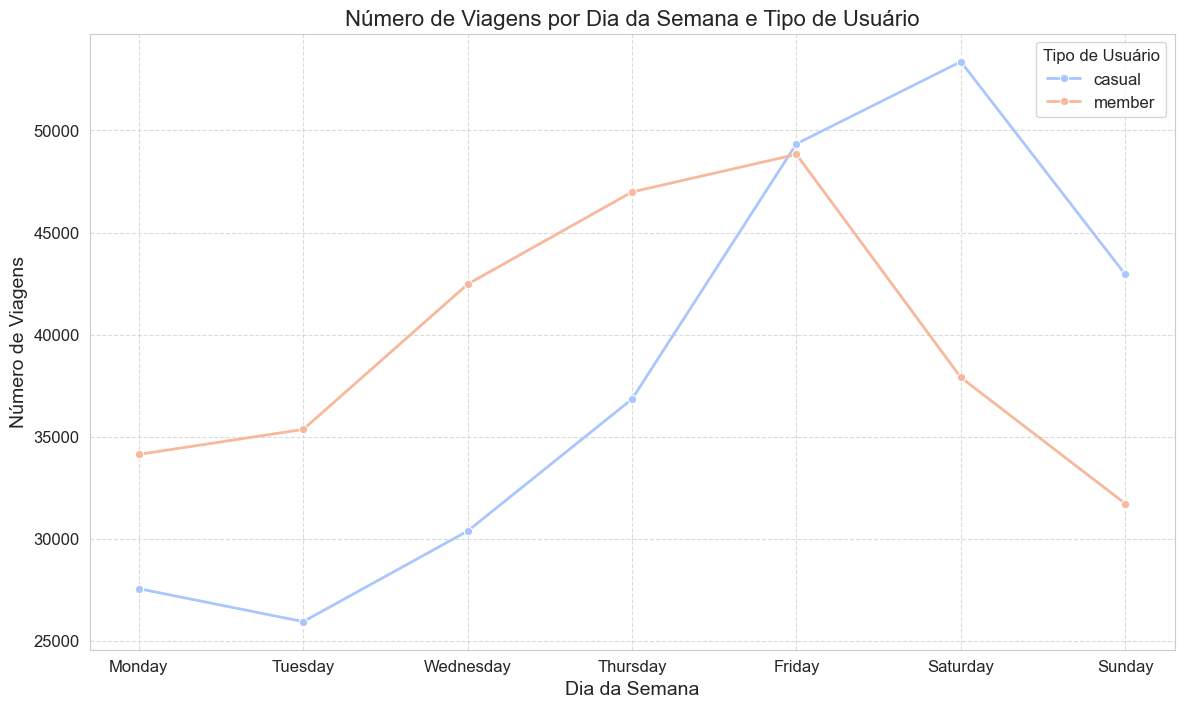


Insight 2: Membros utilizam as bicicletas de forma consistente durante a semana, com um leve aumento nos dias úteis, indicando uso para deslocamento. Ciclistas casuais, por outro lado, têm um pico de uso nos fins de semana, reforçando a ideia de uso recreativo.


In [25]:
# 21 Número de Viagens por Dia da Semana e Tipo de Usuário (Line Plot)
plt.figure(figsize=(14, 8))
sns.lineplot(x='day_of_week', y='count', hue='member_casual', data=ride_counts_dow.stack().reset_index(name='count'), marker='o', lw=2, palette='coolwarm')
plt.title('Número de Viagens por Dia da Semana e Tipo de Usuário')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
plt.legend(title='Tipo de Usuário')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nInsight 2: Membros utilizam as bicicletas de forma consistente durante a semana, com um leve aumento nos dias úteis, indicando uso para deslocamento. Ciclistas casuais, por outro lado, têm um pico de uso nos fins de semana, reforçando a ideia de uso recreativo.")


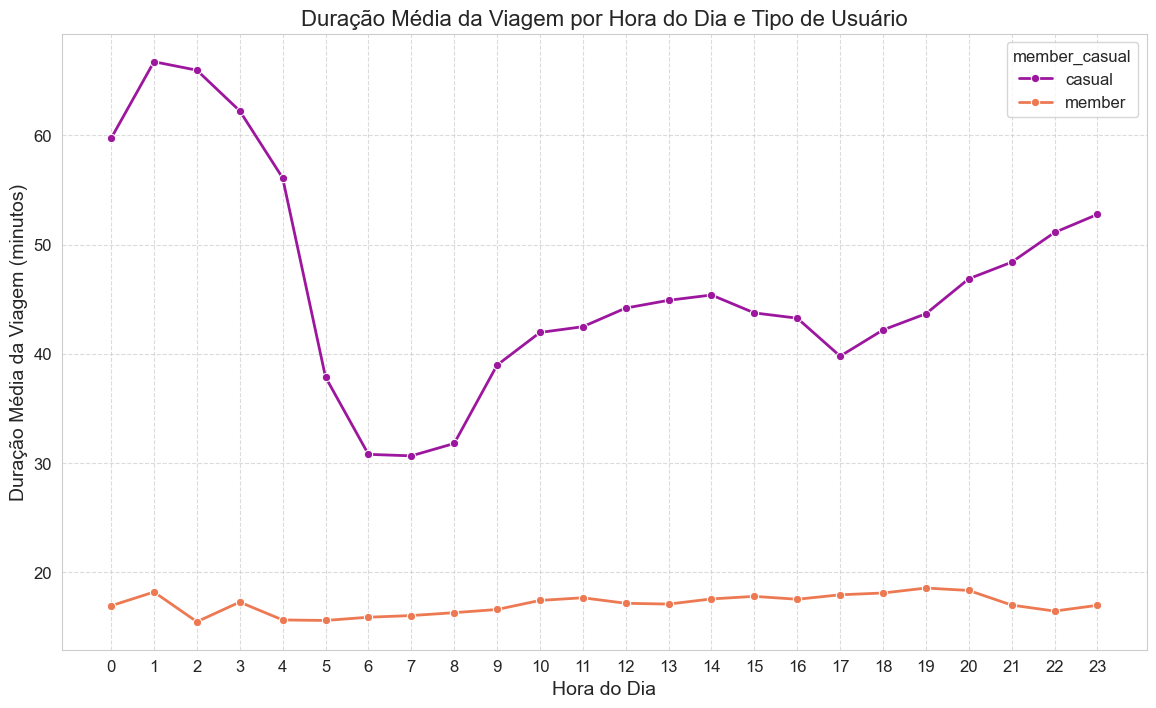


Insight 3: Ciclistas casuais tendem a fazer viagens mais longas em todas as horas do dia, mas especialmente fora dos horários de pico de deslocamento (manhã e fim de tarde), o que reforça o uso de lazer. Membros mantêm durações de viagem mais curtas e consistentes.


In [26]:
# 22 Duração Média da Viagem por Hora do Dia (Line Plot)
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour_of_day', y='ride_length_minutes', hue='member_casual', data=avg_ride_length_hour.stack().reset_index(name='ride_length_minutes'), marker='o', lw=2, palette='plasma')
plt.title('Duração Média da Viagem por Hora do Dia e Tipo de Usuário')
plt.xlabel('Hora do Dia')
plt.ylabel('Duração Média da Viagem (minutos)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nInsight 3: Ciclistas casuais tendem a fazer viagens mais longas em todas as horas do dia, mas especialmente fora dos horários de pico de deslocamento (manhã e fim de tarde), o que reforça o uso de lazer. Membros mantêm durações de viagem mais curtas e consistentes.")


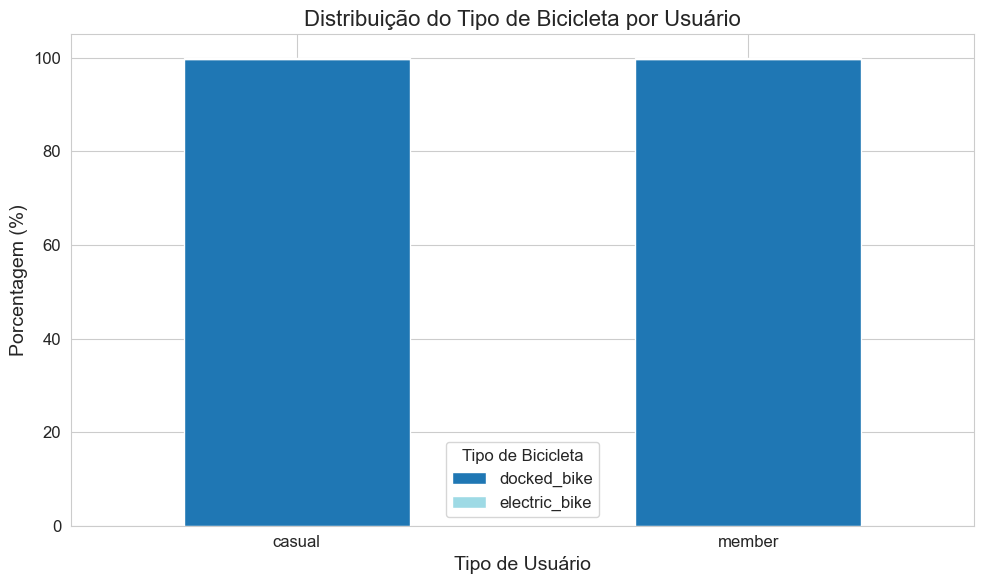


Insight 4: Ambos os grupos usam principalmente bicicletas clássicas e elétricas. A proporção de 'docked_bike' (bicicletas fixas em docas) pode ser mínima ou inexistente nos dados mais recentes, já que as bicicletas elétricas e clássicas são mais prevalentes. Se houver 'docked_bike', pode indicar um uso mais tradicional por membros.


In [27]:
# 23 Uso de Tipos de Bicicleta (Stacked Bar Plot)
bike_type_usage_percent.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Distribuição do Tipo de Bicicleta por Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Bicicleta')
plt.tight_layout()
plt.show()

print("\nInsight 4: Ambos os grupos usam principalmente bicicletas clássicas e elétricas. A proporção de 'docked_bike' (bicicletas fixas em docas) pode ser mínima ou inexistente nos dados mais recentes, já que as bicicletas elétricas e clássicas são mais prevalentes. Se houver 'docked_bike', pode indicar um uso mais tradicional por membros.")


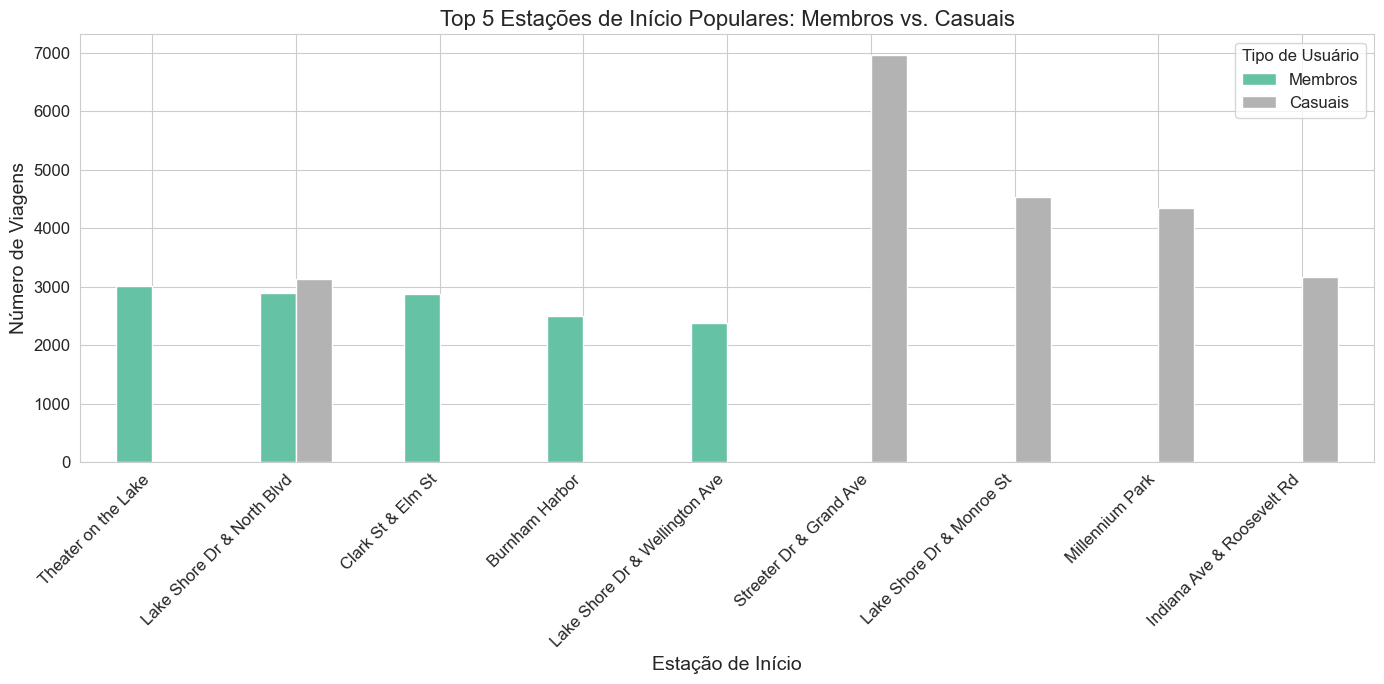


Insight 5: Observar as estações mais populares de cada grupo pode revelar se membros e casuais têm pontos de partida preferenciais que se alinham com deslocamento (membros) ou lazer/turismo (casuais). Por exemplo, estações perto de escritórios para membros e perto de parques/atrações turísticas para casuais.


In [28]:
# 24 Top 5 Estações de Início (Bar Plot Comparativo)
# Unindo os top 5 para ambos os grupos para uma visualização combinada
top_stations_combined = pd.concat([
    top_start_members.head(5).rename('Membros'),
    top_start_casuals.head(5).rename('Casuais')
], axis=1).fillna(0) # Preenche NaN se uma estação não estiver no top 5 do outro grupo

top_stations_combined.plot(kind='bar', figsize=(14, 7), colormap='Set2')
plt.title('Top 5 Estações de Início Populares: Membros vs. Casuais')
plt.xlabel('Estação de Início')
plt.ylabel('Número de Viagens')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()

print("\nInsight 5: Observar as estações mais populares de cada grupo pode revelar se membros e casuais têm pontos de partida preferenciais que se alinham com deslocamento (membros) ou lazer/turismo (casuais). Por exemplo, estações perto de escritórios para membros e perto de parques/atrações turísticas para casuais.")

In [29]:
# 25 Scatter plot de duração da viagem vs. hora do dia, com cor por tipo de usuário (amostra para desempenho)
if 'df' not in globals():
    df = pd.read_csv('Aluguel de bicicletas.csv')  # Ajuste o caminho se necessário

df_sample = df.sample(min(10000, len(df)), random_state=42) # Amostra para gráficos grandes
fig = px.scatter(df_sample, x='hour_of_day', y='ride_length_minutes', color='member_casual',
                 title='Duração da Viagem vs. Hora do Dia por Tipo de Usuário',
                 labels={'hour_of_day': 'Hora do Dia', 'ride_length_minutes': 'Duração da Viagem (minutos)'},
                 hover_data=['day_of_week', 'start_station_name', 'end_station_name'],
                 opacity=0.6, marginal_y='histogram', marginal_x='histogram',
                 color_discrete_map={'member': 'blue', 'casual': 'red'}) # Cores para membros e casuais
fig.update_layout(xaxis_title="Hora do Dia", yaxis_title="Duração da Viagem (Minutos)",
                  xaxis_tickmode='linear', xaxis_dtick=1, yaxis_range=[0, 100]) # Ajusta limites para visibilidade
fig.show()

print("\nInsight Adicional (Interativo): A visualização interativa permite explorar a densidade de viagens e os outliers, confirmando que as viagens mais longas são predominantemente de ciclistas casuais e ocorrem em horários de menor pico de deslocamento.")


Insight Adicional (Interativo): A visualização interativa permite explorar a densidade de viagens e os outliers, confirmando que as viagens mais longas são predominantemente de ciclistas casuais e ocorrem em horários de menor pico de deslocamento.


In [30]:
# Célula de Código

print("--- Resumo das Ações a Serem Tomadas para a Cyclistic ---")
print("\nCom base nos insights da análise, as ações a serem tomadas pela Cyclistic para converter ciclistas casuais em membros anuais podem ser resumidas em três pilares principais:")
print("\n1.  **Marketing Focado no Valor do Lazer e da Liberdade para Membros:**")
print("    - Ação: Desenvolver campanhas de marketing que destaquem os benefícios da assinatura anual para atividades de lazer e turismo, não apenas para deslocamento. Isso inclui o uso de temas como 'Explorando Chicago sem limites' ou 'Fins de semana ilimitados de bicicleta'.")
print("    - Justificativa: Ciclistas casuais realizam viagens significativamente mais longas, especialmente nos fins de semana, indicando um uso mais recreativo. Apelar para esse uso pode ser mais eficaz do que focar apenas na conveniência do dia a dia.")
print("    - Mídia Digital: Utilizar plataformas como Instagram e Facebook para anúncios visuais de passeios de lazer e oferecer 'Testes de Fim de Semana Grátis' que depois direcionam para a assinatura anual.")
print("\n2.  **Programas de Incentivo e Fidelidade Progressivos:**")
print("    - Ação: Implementar um sistema de recompensa para ciclistas casuais, como pontos ou descontos progressivos para cada viagem. Após um certo número de viagens ou valor gasto, oferecer um desconto substancial ou um período de assinatura gratuita.")
print("    - Justificativa: Ciclistas casuais já estão cientes da Cyclistic e a utilizam. Eles precisam de um incentivo direto e um 'empurrão' para fazer a transição para a assinatura anual.")
print("    - Mídia Digital: Enviar e-mails e notificações personalizadas para ciclistas casuais, mostrando o quanto eles teriam economizado com uma assinatura com base em seu histórico de uso, e apresentar ofertas de conversão atraentes.")
print("\n3.  **Comunicação Segmentada e Foco na Conveniência da Assinatura:**")
print("    - Ação: Criar mensagens de marketing diferenciadas que se alinhem com os padrões de uso de cada segmento de ciclistas casuais. Para aqueles com viagens mais longas, enfatizar a 'liberdade ilimitada' da assinatura. Para os que fazem viagens mais curtas, mas frequentes, destacar a 'conveniência e agilidade' de não precisar comprar um passe a cada vez.")
print("    - Justificativa: A análise revela diferentes comportamentos de uso. A comunicação precisa ser adaptada para ressoar com as motivações específicas de cada subgrupo de ciclistas casuais.")
print("    - Mídia Digital: Anúncios contextuais em sites de turismo ou lazer para casuais de fim de semana, e retargeting com mensagens de conveniência para aqueles que usam a bicicleta mais regularmente.")

--- Resumo das Ações a Serem Tomadas para a Cyclistic ---

Com base nos insights da análise, as ações a serem tomadas pela Cyclistic para converter ciclistas casuais em membros anuais podem ser resumidas em três pilares principais:

1.  **Marketing Focado no Valor do Lazer e da Liberdade para Membros:**
    - Ação: Desenvolver campanhas de marketing que destaquem os benefícios da assinatura anual para atividades de lazer e turismo, não apenas para deslocamento. Isso inclui o uso de temas como 'Explorando Chicago sem limites' ou 'Fins de semana ilimitados de bicicleta'.
    - Justificativa: Ciclistas casuais realizam viagens significativamente mais longas, especialmente nos fins de semana, indicando um uso mais recreativo. Apelar para esse uso pode ser mais eficaz do que focar apenas na conveniência do dia a dia.
    - Mídia Digital: Utilizar plataformas como Instagram e Facebook para anúncios visuais de passeios de lazer e oferecer 'Testes de Fim de Semana Grátis' que depois direcionam